#Import Libraries


In [538]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
import re
import matplotlib.pyplot as plt
import numpy
import pandas


In [539]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [540]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [541]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd
import re

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Review Dataset

In [542]:

resumeDataSet = pd.read_csv('drive/MyDrive/Nlp_dataset.csv' ,encoding='utf-8')
resumeDataSet.head()

Category                                             Resume
0  Data Science  qwtnrvduof Skills * Programming Languages: Pyt...
1  Data Science  qwtnrvduof Areas of Interest Deep Learning, Co...
2  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
3  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
4  Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...

In [543]:
null_values = resumeDataSet.isnull().sum()
null_values

Category    0
Resume      0
dtype: int64

In [544]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())
resumeDataSet=resumeDataSet.drop_duplicates(subset=['Category', 'Resume'], keep='first')
resumeDataSet.shape

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               839
Testing                      699
DevOps Engineer              549
Python Developer             479
Web Designing                449
HR                           439
Hadoop                       419
Sales                        399
Data Science                 399
Mechanical Engineer          399
ETL Developer                399
Blockchain                   399
Operations Manager           399
Arts                         359
Database                     329
Health and fitness           299
PMO                          299
Electrical Engineering       299
Business Analyst             279
DotNet Developer             279
Automation Testing           259
Network Security Engineer    249
Civil Engineer               239
SAP Developer                239
Advocate                     199
Name: Category, dtype: int64


(191, 2)

<Axes: xlabel='count', ylabel='Category'>

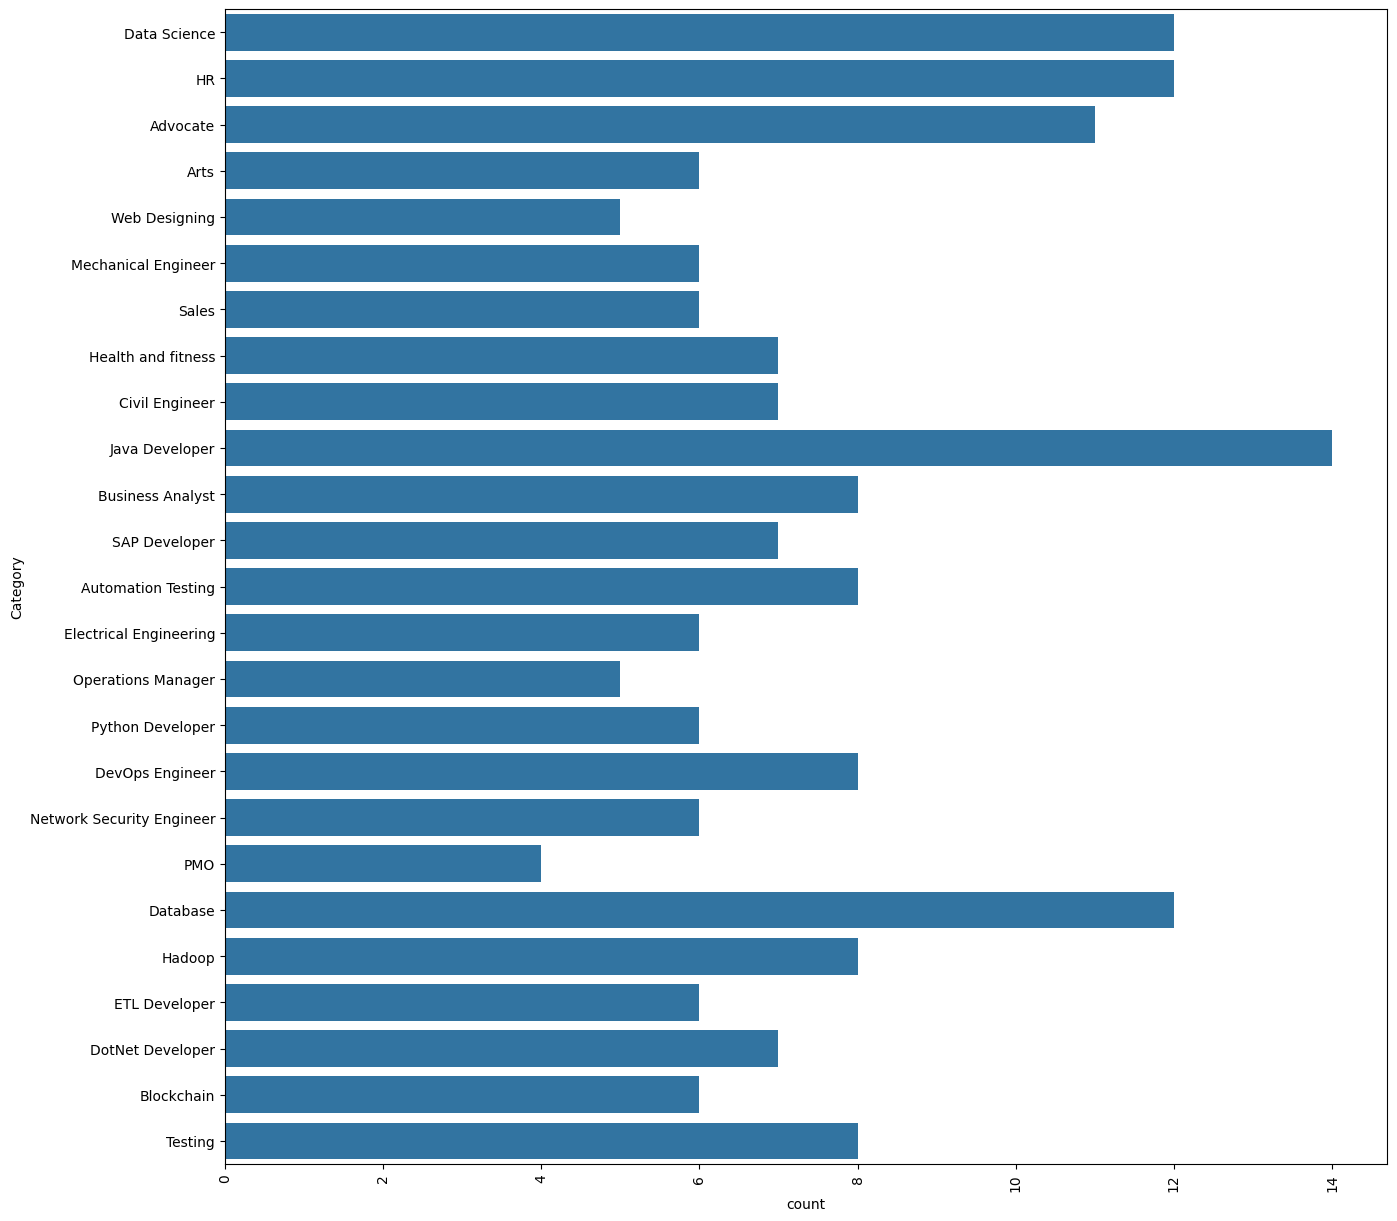

In [545]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

#Pre-Processing

In [546]:

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[^\x00-\x7f]', ' ', resumeText)  # Remove non-ASCII characters
    resumeText = re.sub('\d+', ' ', resumeText)
    resumeText = resumeText.lower()

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(resumeText)
    tokens = [word for word in tokens if word.lower() not in stop_words]

    resumeText = ' '.join(tokens)

    resumeText = re.sub('\s+', ' ', resumeText)  # Remove extra whitespace
    resumeText = ' '.join(word for word in resumeText.split() if len(word) > 1)  # Remove short words
    return resumeText

In [547]:
resumeDataSet['Cleaned_Resume'] = resumeDataSet['Resume'].apply(cleanResume)

print(resumeDataSet[['Resume', 'Cleaned_Resume']].head())

                                              Resume  \
0  qwtnrvduof Skills * Programming Languages: Pyt...   
1  qwtnrvduof Areas of Interest Deep Learning, Co...   
2  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
3  Education Details \r\n MCA   YMCAUST,  Faridab...   
4  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   

                                      Cleaned_Resume  
0  qwtnrvduof skills programming languages python...  
1  qwtnrvduof areas interest deep learning contro...  
2  skills python sap hana tableau sap hana sql sa...  
3  education details mca ymcaust faridabad haryan...  
4  skills basics iot python matlab data science m...  


In [548]:
resumeDataSet

Category                                             Resume  \
0         Data Science  qwtnrvduof Skills * Programming Languages: Pyt...   
1         Data Science  qwtnrvduof Areas of Interest Deep Learning, Co...   
2         Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
3         Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   
4         Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...   
...                ...                                                ...   
872            Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...   
873            Testing  Skill Set OS Windows XP/7/8/8bNTGBqLmkK1/10 Da...   
874            Testing  â¢ Good logical and analytical skills â¢ Pos...   
877            Testing  â Willingness to accept the challengesbNTGBq...   
7135  Business Analyst  Education Details \nFebruary 2006 to February ...   

                                         Cleaned_Resume  
0     qwtnrvduof skills programming languages python...  
1     qwtnrvduof areas interest deep learning contro...  
2     skills python sap hana tableau sap hana sql sa...  
3     education details mca ymcaust faridabad haryan...  
4     skills basics iot python matlab data science m...  
...                                                 ...  
872   computer skills software knowledge ms power po...  
873   skill set os windows xp bntgbqlmkk database my...  
874   good logical analytical skills positive attitu...  
877   willingness ept challengesbntgbqlmkk positive ...  
7135  education details february february tybcom com...  

[191 rows x 3 columns]

In [549]:
lemmatizer = WordNetLemmatizer()
resumeDataSet['Cleaned_Resume'] = resumeDataSet['Cleaned_Resume'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

resumeDataSet
resumeDataSet2=resumeDataSet

In [550]:
import pandas as pd

# 假设你已经有了名为 resumeDataSet 的 DataFrame，其中包含了 "Cleaned_Resume" 和 "Category" 列

# 从 resumeDataSet 中提取 'Cleaned_Resume' 和 'Category' 列
cleaned_resume_category_df = resumeDataSet[[ 'Category','Cleaned_Resume']]

# 创建一个新的 DataFrame
new_df = pd.DataFrame(cleaned_resume_category_df)

# 打印新的 DataFrame
new_df


Category                                     Cleaned_Resume
0         Data Science  qwtnrvduof skill programming language python p...
1         Data Science  qwtnrvduof area interest deep learning control...
2         Data Science  skill python sap hana tableau sap hana sql sap...
3         Data Science  education detail mca ymcaust faridabad haryana...
4         Data Science  skill basic iot python matlab data science mac...
...                ...                                                ...
872            Testing  computer skill software knowledge m power poin...
873            Testing  skill set o window xp bntgbqlmkk database mysq...
874            Testing  good logical analytical skill positive attitud...
877            Testing  willingness ept challengesbntgbqlmkk positive ...
7135  Business Analyst  education detail february february tybcom comm...

[191 rows x 2 columns]

In [551]:
import random
import pandas as pd
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

def randomize_sentence(sentence, replacement_probability=0.5):
    words = sentence.split()
    randomized_words = []
    for word in words:

        if random.random() < replacement_probability:
            synonyms = get_synonyms(word)
            if synonyms:
                synonym = random.choice(synonyms)
                word = synonym
        randomized_words.append(word)

    randomized_sentence = ' '.join(randomized_words)
    return randomized_sentence


data = new_df
new_df = pd.DataFrame(data)

replacement_probability = 0.9

for i in range(len(new_df)):
    input_sentence = new_df['Cleaned_Resume'][i]
    randomized_sentence = randomize_sentence(input_sentence, replacement_probability)
    new_row = {'Cleaned_Resume': randomized_sentence, 'Category': new_df['Category'][i]}

    new_df = new_df.append(new_row, ignore_index=True)

new_df


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-551-0076997c146c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-551-0076997c146c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-551-0076997c146c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-551-0076997c146c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index

Category                                     Cleaned_Resume
0        Data Science  qwtnrvduof skill programming language python p...
1        Data Science  qwtnrvduof area interest deep learning control...
2        Data Science  skill python sap hana tableau sap hana sql sap...
3        Data Science  education detail mca ymcaust faridabad haryana...
4        Data Science  skill basic iot python matlab data science mac...
..                ...                                                ...
377           Testing  computer attainment package cognition MB might...
378           Testing  acquirement determine o windowpane xp bntgbqlm...
379           Testing  safe legitimate analytical skill confirming at...
380           Testing  willingness ept challengesbntgbqlmkk irrefutab...
381  Business Analyst  pedagogy particular February February tybcom C...

[382 rows x 2 columns]

In [552]:
new_df

Category                                     Cleaned_Resume
0        Data Science  qwtnrvduof skill programming language python p...
1        Data Science  qwtnrvduof area interest deep learning control...
2        Data Science  skill python sap hana tableau sap hana sql sap...
3        Data Science  education detail mca ymcaust faridabad haryana...
4        Data Science  skill basic iot python matlab data science mac...
..                ...                                                ...
377           Testing  computer attainment package cognition MB might...
378           Testing  acquirement determine o windowpane xp bntgbqlm...
379           Testing  safe legitimate analytical skill confirming at...
380           Testing  willingness ept challengesbntgbqlmkk irrefutab...
381  Business Analyst  pedagogy particular February February tybcom C...

[382 rows x 2 columns]

In [553]:
resumeDataSet=new_df

In [554]:
resumeDataSet.duplicated().sum()

1

In [555]:
new_df['Cleaned_Resume'][0]

'qwtnrvduof skill programming language python panda numpy scipy scikit learn matplotlib tbsmxsclacjwwhvhaakyfjfvpvloldvdfsqftyry'

In [556]:
new_df['Cleaned_Resume'][191]

'qwtnrvduof accomplishment programme spoken_communication python panda numpy scipy scikit learn matplotlib tbsmxsclacjwwhvhaakyfjfvpvloldvdfsqftyry'

In [557]:
new_df['Cleaned_Resume'][1]

'qwtnrvduof area interest deep learning control system design programming python electric machinery web development analytics technical activity hindustan aeronautics limited bangalore week guidance mrbntgbqlmkk satish senior engineer hangar mirage fighter aircraft technical skill programming matlab python java labview python webframework django flask ltspice intermediate language mipower intermediate github gitbash jupyter notebook xampp mysql basic python software package interpreter anaconda python python pycharm java ide eclipse operating system window ubuntu debian kali linux education detail january bckekjofvwqtechqunsobcudt electrical electronics engineering manipal institute technology january deeksha center january little flower public school august manipal academy higher data science data science electrical enthusiast skill detail data analysis exprience le year month excel exprience le year month machine learning exprience le year month mathematics exprience le year month py

In [558]:
new_df['Cleaned_Resume'][192]

'qwtnrvduof area interest abstruse get_word control organization design computer_programing Python galvanic machinery web development analytics technical action Hindustan aeronautics define Bangalore week direction mrbntgbqlmkk satish senior engine_driver hangar mirage hero aircraft technical acquisition programme matlab python coffee labview python webframework django flask ltspice intermediate linguistic_process mipower intermediate github gitbash jupyter notebook xampp mysql basic python software_program computer_software representative anaconda python Python pycharm coffee ide eclipse maneuver scheme window ubuntu debian kelpwort Linux education detail January bckekjofvwqtechqunsobcudt electrical electronics mastermind manipal constitute engineering Jan deeksha center Jan little flower public school_day august manipal honorary_society higher information science data skill electrical enthusiast skill detail data analysis exprience le twelvemonth month surpass exprience LE year month

#Vectorization

In [559]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def vectorize_text(cleaned_resume):
    # Tokenize the text using BERT tokenizer
    tokenized_input = tokenizer(cleaned_resume, return_tensors='pt', truncation=True, padding=True)

    # Return the input IDs (vectorized representation)
    return tokenized_input['input_ids'].squeeze()

In [560]:
resumeDataSet['Vectorized_Embeddings'] = resumeDataSet['Cleaned_Resume'].apply(vectorize_text)
print(resumeDataSet[['Cleaned_Resume', 'Vectorized_Embeddings']].head())

                                      Cleaned_Resume  \
0  qwtnrvduof skill programming language python p...   
1  qwtnrvduof area interest deep learning control...   
2  skill python sap hana tableau sap hana sql sap...   
3  education detail mca ymcaust faridabad haryana...   
4  skill basic iot python matlab data science mac...   

                               Vectorized_Embeddings  
0  [tensor(101), tensor(1053), tensor(26677), ten...  
1  [tensor(101), tensor(1053), tensor(26677), ten...  
2  [tensor(101), tensor(8066), tensor(18750), ten...  
3  [tensor(101), tensor(2495), tensor(6987), tens...  
4  [tensor(101), tensor(8066), tensor(3937), tens...  


#Train

In [561]:
import numpy
import pandas

try:
    import torch
except:
    !pip -qq install torch

import torch.nn as nn

try:
    import transformers
except:
    !pip -qq install transformers

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import os

In [562]:
from sklearn.preprocessing import LabelEncoder

In [563]:
label_encoder = LabelEncoder()
resumeDataSet['Encoded_Category'] = label_encoder.fit_transform(resumeDataSet['Category'])

In [564]:
resumeDataSet.head()

Category                                     Cleaned_Resume  \
0  Data Science  qwtnrvduof skill programming language python p...   
1  Data Science  qwtnrvduof area interest deep learning control...   
2  Data Science  skill python sap hana tableau sap hana sql sap...   
3  Data Science  education detail mca ymcaust faridabad haryana...   
4  Data Science  skill basic iot python matlab data science mac...   

                               Vectorized_Embeddings  Encoded_Category  
0  [tensor(101), tensor(1053), tensor(26677), ten...                 6  
1  [tensor(101), tensor(1053), tensor(26677), ten...                 6  
2  [tensor(101), tensor(8066), tensor(18750), ten...                 6  
3  [tensor(101), tensor(2495), tensor(6987), tens...                 6  
4  [tensor(101), tensor(8066), tensor(3937), tens...                 6

In [565]:
# Prepare sentences and labels
sentences = resumeDataSet.Cleaned_Resume.values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = resumeDataSet.Encoded_Category.values

In [566]:
print(sentences)

['[CLS] qwtnrvduof skill programming language python panda numpy scipy scikit learn matplotlib tbsmxsclacjwwhvhaakyfjfvpvloldvdfsqftyry [SEP]', '[CLS] qwtnrvduof area interest deep learning control system design programming python electric machinery web development analytics technical activity hindustan aeronautics limited bangalore week guidance mrbntgbqlmkk satish senior engineer hangar mirage fighter aircraft technical skill programming matlab python java labview python webframework django flask ltspice intermediate language mipower intermediate github gitbash jupyter notebook xampp mysql basic python software package interpreter anaconda python python pycharm java ide eclipse operating system window ubuntu debian kali linux education detail january bckekjofvwqtechqunsobcudt electrical electronics engineering manipal institute technology january deeksha center january little flower public school august manipal academy higher data science data science electrical enthusiast skill deta

In [567]:
# Pad sequences and create attention masks
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 128
input_ids = pad_sequences(resumeDataSet.Vectorized_Embeddings, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

attention_masks = []
for sequence in input_ids:
    sequence_mask = [float(id > 0) for id in sequence]
    attention_masks.append(sequence_mask)

In [568]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split
training_inputs, validation_inputs, training_labels, validation_labels, training_masks, validation_masks = train_test_split(
    input_ids, labels, attention_masks,
    random_state=21, test_size=0.1
)

In [569]:

validation_inputs, test_inputs, validation_labels, test_labels, validation_masks, test_masks = train_test_split(
   validation_inputs, validation_labels, validation_masks,
    random_state=21, test_size=0.1
)

In [570]:
# Create DataLoader for training set
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 128
training_data = TensorDataset(torch.tensor(training_inputs), torch.tensor(training_masks), torch.tensor(training_labels))
training_sampler = RandomSampler(training_data)
training_dataloader = DataLoader(training_data, sampler=training_sampler, batch_size=batch_size)

# Create DataLoader for validation set
validation_data = TensorDataset(torch.tensor(validation_inputs), torch.tensor(validation_masks), torch.tensor(validation_labels))
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [571]:
len(resumeDataSet.Encoded_Category.unique())

25

In [572]:
# Configure BERT model for sequence classification
from transformers import BertConfig, BertModel
configuration = BertConfig()
model = BertModel(configuration)
configuration = model.config

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=25)
model = nn.DataParallel(model)
model.to(device)

from transformers import AdamW
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5, correct_bias=False)

def flat_accuracy(predicted_labels, labels):
    predicted_labels = numpy.argmax(predicted_labels.to('cpu').numpy(), axis=1).flatten()
    labels = labels.to('cpu').numpy().flatten()
    return numpy.sum(predicted_labels == labels) / len(labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [573]:
# Train the BERT model
from tqdm import trange
epochs = 40
training_losses = []

for epoch in trange(epochs, desc="Epoch"):
    model.train()
    training_loss = 0
    training_steps = 0

    for step, batch in enumerate(training_dataloader):
        inputs = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
        training_steps += 1

        training_losses.append(loss.item())

    average_training_loss = training_loss/training_steps
    print("Epoch {}: Average Training Loss: {}".format(epoch+1, average_training_loss))

    model.eval()
    validation_accuracy = 0
    validation_steps = 0

    for batch in validation_dataloader:
        inputs = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = model(inputs, attention_mask=attention_masks, labels=labels)

        logits = outputs.logits
        temp_validation_accuracy = flat_accuracy(logits, labels)
        validation_accuracy += temp_validation_accuracy
        validation_steps += 1

    average_validation_accuracy = validation_accuracy/validation_steps
    print("Epoch {}: Validation Accuracy: {}".format(epoch+1, average_validation_accuracy))


Epoch:   2%|▎         | 1/40 [00:01<01:02,  1.60s/it]

Epoch 1: Average Training Loss: 3.2321194807688394
Epoch 1: Validation Accuracy: 0.02857142857142857


Epoch:   5%|▌         | 2/40 [00:03<01:00,  1.58s/it]

Epoch 2: Average Training Loss: 3.1889122327168784
Epoch 2: Validation Accuracy: 0.08571428571428572


Epoch:   8%|▊         | 3/40 [00:04<00:58,  1.58s/it]

Epoch 3: Average Training Loss: 3.1585936546325684
Epoch 3: Validation Accuracy: 0.08571428571428572


Epoch:  10%|█         | 4/40 [00:06<00:56,  1.57s/it]

Epoch 4: Average Training Loss: 3.113013982772827
Epoch 4: Validation Accuracy: 0.14285714285714285


Epoch:  12%|█▎        | 5/40 [00:07<00:55,  1.57s/it]

Epoch 5: Average Training Loss: 3.034755071004232
Epoch 5: Validation Accuracy: 0.11428571428571428


Epoch:  15%|█▌        | 6/40 [00:09<00:53,  1.57s/it]

Epoch 6: Average Training Loss: 2.9439748922983804
Epoch 6: Validation Accuracy: 0.17142857142857143


Epoch:  18%|█▊        | 7/40 [00:11<00:51,  1.57s/it]

Epoch 7: Average Training Loss: 2.7771209081014
Epoch 7: Validation Accuracy: 0.14285714285714285


Epoch:  20%|██        | 8/40 [00:12<00:50,  1.57s/it]

Epoch 8: Average Training Loss: 2.6743226051330566
Epoch 8: Validation Accuracy: 0.2857142857142857


Epoch:  22%|██▎       | 9/40 [00:14<00:48,  1.57s/it]

Epoch 9: Average Training Loss: 2.469709634780884
Epoch 9: Validation Accuracy: 0.22857142857142856


Epoch:  25%|██▌       | 10/40 [00:15<00:47,  1.57s/it]

Epoch 10: Average Training Loss: 2.2312033971150718
Epoch 10: Validation Accuracy: 0.3142857142857143


Epoch:  28%|██▊       | 11/40 [00:17<00:45,  1.57s/it]

Epoch 11: Average Training Loss: 2.015725572903951
Epoch 11: Validation Accuracy: 0.37142857142857144


Epoch:  30%|███       | 12/40 [00:18<00:43,  1.57s/it]

Epoch 12: Average Training Loss: 1.818001667658488
Epoch 12: Validation Accuracy: 0.6


Epoch:  32%|███▎      | 13/40 [00:20<00:42,  1.57s/it]

Epoch 13: Average Training Loss: 1.6165892283121746
Epoch 13: Validation Accuracy: 0.5714285714285714


Epoch:  35%|███▌      | 14/40 [00:22<00:40,  1.57s/it]

Epoch 14: Average Training Loss: 1.4377712806065877
Epoch 14: Validation Accuracy: 0.8


Epoch:  38%|███▊      | 15/40 [00:23<00:39,  1.57s/it]

Epoch 15: Average Training Loss: 1.1934397617975872
Epoch 15: Validation Accuracy: 0.8


Epoch:  40%|████      | 16/40 [00:25<00:37,  1.57s/it]

Epoch 16: Average Training Loss: 1.0170971751213074
Epoch 16: Validation Accuracy: 0.8285714285714286


Epoch:  42%|████▎     | 17/40 [00:26<00:36,  1.57s/it]

Epoch 17: Average Training Loss: 0.8366869489351908
Epoch 17: Validation Accuracy: 0.8285714285714286


Epoch:  45%|████▌     | 18/40 [00:28<00:34,  1.57s/it]

Epoch 18: Average Training Loss: 0.6836886604626974
Epoch 18: Validation Accuracy: 0.8857142857142857


Epoch:  48%|████▊     | 19/40 [00:29<00:32,  1.57s/it]

Epoch 19: Average Training Loss: 0.5413206815719604
Epoch 19: Validation Accuracy: 0.8857142857142857


Epoch:  50%|█████     | 20/40 [00:31<00:31,  1.57s/it]

Epoch 20: Average Training Loss: 0.4493284424146016
Epoch 20: Validation Accuracy: 0.8857142857142857


Epoch:  52%|█████▎    | 21/40 [00:33<00:29,  1.57s/it]

Epoch 21: Average Training Loss: 0.3533056676387787
Epoch 21: Validation Accuracy: 0.8857142857142857


Epoch:  55%|█████▌    | 22/40 [00:34<00:28,  1.57s/it]

Epoch 22: Average Training Loss: 0.2889869610468547
Epoch 22: Validation Accuracy: 0.8857142857142857


Epoch:  57%|█████▊    | 23/40 [00:36<00:26,  1.57s/it]

Epoch 23: Average Training Loss: 0.2385403960943222
Epoch 23: Validation Accuracy: 0.8857142857142857


Epoch:  60%|██████    | 24/40 [00:37<00:25,  1.57s/it]

Epoch 24: Average Training Loss: 0.2041194587945938
Epoch 24: Validation Accuracy: 0.8857142857142857


Epoch:  62%|██████▎   | 25/40 [00:39<00:23,  1.57s/it]

Epoch 25: Average Training Loss: 0.1692820986111959
Epoch 25: Validation Accuracy: 0.8857142857142857


Epoch:  65%|██████▌   | 26/40 [00:40<00:21,  1.57s/it]

Epoch 26: Average Training Loss: 0.14777986208597818
Epoch 26: Validation Accuracy: 0.8857142857142857


Epoch:  68%|██████▊   | 27/40 [00:42<00:20,  1.57s/it]

Epoch 27: Average Training Loss: 0.12989485512177149
Epoch 27: Validation Accuracy: 0.8857142857142857


Epoch:  70%|███████   | 28/40 [00:43<00:18,  1.57s/it]

Epoch 28: Average Training Loss: 0.11449206372102101
Epoch 28: Validation Accuracy: 0.9142857142857143


Epoch:  72%|███████▎  | 29/40 [00:45<00:17,  1.57s/it]

Epoch 29: Average Training Loss: 0.10406951109568278
Epoch 29: Validation Accuracy: 0.8857142857142857


Epoch:  75%|███████▌  | 30/40 [00:47<00:15,  1.57s/it]

Epoch 30: Average Training Loss: 0.09232704838116963
Epoch 30: Validation Accuracy: 0.8857142857142857


Epoch:  78%|███████▊  | 31/40 [00:48<00:14,  1.57s/it]

Epoch 31: Average Training Loss: 0.08719129363695781
Epoch 31: Validation Accuracy: 0.8857142857142857


Epoch:  80%|████████  | 32/40 [00:50<00:12,  1.57s/it]

Epoch 32: Average Training Loss: 0.07834549744923909
Epoch 32: Validation Accuracy: 0.8857142857142857


Epoch:  82%|████████▎ | 33/40 [00:51<00:10,  1.57s/it]

Epoch 33: Average Training Loss: 0.07363963375488917
Epoch 33: Validation Accuracy: 0.8857142857142857


Epoch:  85%|████████▌ | 34/40 [00:53<00:09,  1.57s/it]

Epoch 34: Average Training Loss: 0.06878262261549632
Epoch 34: Validation Accuracy: 0.8857142857142857


Epoch:  88%|████████▊ | 35/40 [00:54<00:07,  1.57s/it]

Epoch 35: Average Training Loss: 0.06474605947732925
Epoch 35: Validation Accuracy: 0.9142857142857143


Epoch:  90%|█████████ | 36/40 [00:56<00:06,  1.57s/it]

Epoch 36: Average Training Loss: 0.06208660205205282
Epoch 36: Validation Accuracy: 0.8857142857142857


Epoch:  92%|█████████▎| 37/40 [00:58<00:04,  1.57s/it]

Epoch 37: Average Training Loss: 0.059069499373435974
Epoch 37: Validation Accuracy: 0.8857142857142857


Epoch:  95%|█████████▌| 38/40 [00:59<00:03,  1.57s/it]

Epoch 38: Average Training Loss: 0.056241635233163834
Epoch 38: Validation Accuracy: 0.8857142857142857


Epoch:  98%|█████████▊| 39/40 [01:01<00:01,  1.57s/it]

Epoch 39: Average Training Loss: 0.05298588921626409
Epoch 39: Validation Accuracy: 0.8857142857142857


Epoch: 100%|██████████| 40/40 [01:02<00:00,  1.57s/it]

Epoch 40: Average Training Loss: 0.05207564185063044
Epoch 40: Validation Accuracy: 0.8857142857142857


In [574]:
input_ids = torch.tensor(test_inputs)
attention_masks = torch.tensor(test_masks)
labels = torch.tensor(test_labels)

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_dataloader = DataLoader(prediction_data, batch_size=batch_size)

In [575]:
model.eval()
logits_set = []
labels_set = []

for batch in prediction_dataloader:
    batch_input_ids, batch_attention_masks, batch_labels = batch
    batch_input_ids, batch_attention_masks, batch_labels = batch_input_ids.to(device), batch_attention_masks.to(device), batch_labels.to(device)

    with torch.no_grad():
        outputs = model(batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

    logits_set.append(logits.cpu().numpy())
    labels_set.append(batch_labels.cpu().numpy())

from sklearn.metrics import matthews_corrcoef
matthews_set = []

# Calculate Matthews correlation coefficient for each batch
for i in range(len(labels_set)):
    mcc = matthews_corrcoef(labels_set[i], numpy.argmax(logits_set[i], axis=1).flatten())
    matthews_set.append(mcc)

for i, mcc in enumerate(matthews_set):
    print(f"Batch {i + 1}: MCC = {mcc}")

# Calculate the overall Matthews correlation coefficient
overall_mcc = numpy.mean(matthews_set)
print(f"\nOverall MCC: {overall_mcc}")

Batch 1: MCC = 0.75

Overall MCC: 0.75


# Test ing

In [576]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(resumeDataSet['Cleaned_Resume'], resumeDataSet['Encoded_Category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy rate:", accuracy)


Accuracy rate: 0.8961038961038961
